In [9]:
import pandas as pd
a=pd.read_table("AROs_file.csv", sep=",", index_col=0, nrows=100)

In [10]:
a[0:5]

,Genome_Bin,AROs
0,GMBC10.059_230,"ARO:1000001,ARO:3000000,ARO:3000012,ARO:300049..."
1,GMBC10.065_422,"ARO:1000001,ARO:3000000,ARO:3000012,ARO:300049..."
2,GMBC10.069_549,"ARO:1000001,ARO:3000000,ARO:3000012,ARO:300049..."
3,GMBC10.077_233,"ARO:1000001,ARO:3000000,ARO:3000012,ARO:300049..."
4,GMBC10.086_415,"ARO:1000001,ARO:3000000,ARO:3000012,ARO:300049..."


In [11]:
a['AROs'] = a['AROs'].str.split(',').apply(set)
AROs = set.union(*a['AROs'].tolist())
len(AROs)

10

100%|██████████| 10/10 [00:00<00:00, 180.40it/s]


            ARO:3002943 ARO:1000001 ARO:3000494 ARO:3000000 ARO:3000006  \
ARO:3002943          50          50          50          50          50   
ARO:1000001          50         100         100         100          50   
ARO:3000494          50         100         100         100          50   
ARO:3000000          50         100         100         100          50   
ARO:3000006          50          50          50          50          50   
ARO:3000012          50         100         100         100          50   
ARO:3002905           0          50          50          50           0   
ARO:3000574           0          50          50          50           0   
ARO:3002976          50         100         100         100          50   
ARO:3003728           0          50          50          50           0   

            ARO:3000012 ARO:3002905 ARO:3000574 ARO:3002976 ARO:3003728  
ARO:3002943          50           0           0          50           0  
ARO:1000001         100   

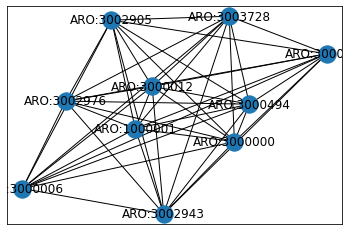

In [12]:
# AROs co-occurrence matrix.
from tqdm import tqdm
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
adj_m = pd.DataFrame(index=AROs, columns=AROs)
for aros_i in tqdm(AROs):
    for aros_j in AROs:
        # print(genome_bin_i)
        # print(set([type(aro) for aro in aros_i]))
        # print(genome_bin_j)
        # print(set([type(aro) for aro in aros_j]))
        value = a[a.AROs.apply(lambda x: aros_i in x and aros_j in x)].shape[0]
        G.add_edge(aros_i, aros_j, weight=value)
        adj_m.loc[aros_i, aros_j] = value
        adj_m.loc[aros_j, aros_i] = value
print(adj_m.iloc[0:10, 0:10])
density = nx.density(G)
print("Network density:", density)
nx.draw_networkx(G, with_labels=True)
plt.savefig("p00p.png", dpi=300, bbox_inches='tight')
plt.show()


In [18]:
adj_m.iloc[0:10, 0:10]

,ARO:3000210,ARO:3002987,ARO:3000240,ARO:3000202,ARO:3002815,ARO:3000556,ARO:3003318,ARO:0010004,ARO:3003680,ARO:3003787
ARO:3000210,32,0,0,0,0,0,0,0,0,0
ARO:3002987,0,895,0,0,0,0,0,0,0,0
ARO:3000240,0,0,99,99,96,0,0,0,0,0
ARO:3000202,0,0,99,99,96,0,0,0,0,0
ARO:3002815,0,0,96,96,96,0,0,0,0,0
ARO:3000556,0,0,0,0,0,59,0,0,0,0
ARO:3003318,0,0,0,0,0,0,76,0,0,76
ARO:0010004,0,0,0,0,0,0,0,493,0,0
ARO:3003680,0,0,0,0,0,0,0,0,120,0
ARO:3003787,0,0,0,0,0,0,76,0,0,76


In [6]:
adj_m

,ARO:3002926,ARO:3000521,ARO:3003835,ARO:3003952,ARO:3000501,ARO:3004361,ARO:3003787,ARO:3000267,ARO:3003425,ARO:3002987,...,ARO:3000196,ARO:3000071,ARO:3003693,ARO:3003276,ARO:3004269,ARO:3000195,ARO:3004028,ARO:3002882,ARO:3000816,ARO:3003724
ARO:3002926,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ARO:3000521,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ARO:3003835,0,0,59,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ARO:3003952,0,0,0,46,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ARO:3000501,0,0,0,0,32,0,0,0,0,0,...,0,0,0,32,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ARO:3000195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
ARO:3004028,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
ARO:3002882,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,22,0,0
ARO:3000816,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,557,0


In [8]:
adj_m.to_csv("AROs_co-occuerence.csv")